Hours      int64
Marks      int64
Rand     float64
round      int32
dtype: object
    Hours  Marks  Rand  round
0       0     34  0.57      1
1       1     36  0.95      1
2       1     33  0.18      0
3       1     39  0.43      0
4       1     42  0.02      0
5       2     45  0.40      0
6       2     38  0.39      0
7       3     45  0.78      1
8       3     53  0.63      1
9       3     46  0.17      0
10      3     56  0.44      0
11      4     59  0.28      0
12      4     55  0.50      0
13      4     56  0.39      0
14      5     72  0.01      0
15      5     59  0.67      1
16      6     62  0.76      1
17      6     71  0.20      0
18      7     78  0.83      1
19      7     88  0.88      1
20      7     61  0.97      1
21      7     74  0.39      0
22      8     71  0.85      1
23      8     89  0.19      0
24      9     82  0.96      1
25      9     67  0.13      0
26      9     89  0.36      0
27     10     81  0.14      0
28     10     82  0.33      0
29     11     79  

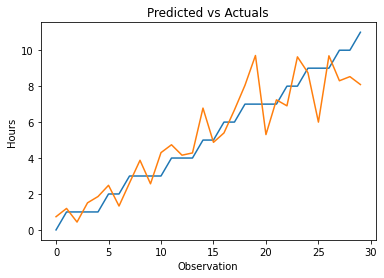

                            OLS Regression Results                            
Dep. Variable:                  Hours   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     68.92
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           2.47e-11
Time:                        13:08:23   Log-Likelihood:                -49.707
No. Observations:                  30   AIC:                             105.4
Df Residuals:                      27   BIC:                             109.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0414      0.970     -5.197      0.0

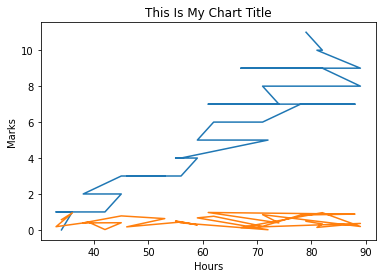

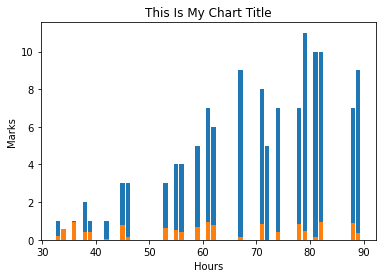

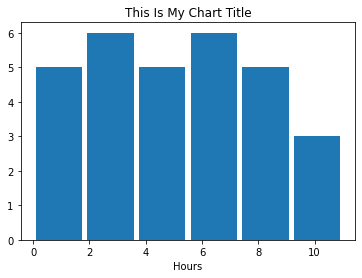

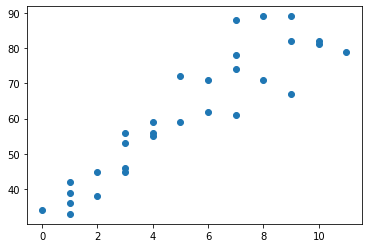

0.5999999999999999
Linear Score 0.6333333333333333
 
Poly Score 0.7
 
0.6
Optimization terminated successfully.
         Current function value: 0.620237
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Thu, 11 Mar 2021   Pseudo R-squ.:                  0.1052
Time:                        13:08:24   Log-Likelihood:                -31.012
converged:                       True   LL-Null:                       -34.657
Covariance Type:            nonrobust   LLR p-value:                   0.02611
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0813      0.308  

In [16]:
## Basic libs
import yfinance as yf
import pandas as pd
import numpy as np
import warnings

## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics




#####################################################################################

#file name that we'll use for data
data_folder = "C:\\Users\\elidmoore\\Documents\\Personal Documents\\Data Science 2021 Course\\005 - Regression\\"
file_to_open = data_folder + "01Students.CSV"
df = open(file_to_open)
data = pd.read_csv(df,)

data["round"]=data['Rand'].round().astype("int")
print(data.dtypes)
print(data)
print(" ")

#show column names
print(" ")

####NEEED TO FIGURE OUT HOW TO RE-ORGANIZE CSV DATA SO THAT IT CAN BE USED IN A REGRESSION, PANDA LAYOUT####
# Set independent and dependent variables
y = data['Hours']
X = data[['Marks', 'Rand']]
X = sm.add_constant(X) # adding a constant

#show descriptive statistics
print(data.describe(include='all'))
print(" ")
ndf=np.array(data.std())
print(ndf.transpose())
print(" ")

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

#plot the predicted trend line
predicted = model.predict(X)
plt.title('Predicted vs Actuals')
plt.xlabel('Observation')
plt.ylabel('Hours')
plt.plot(data.index, y, label='Y')
plt.plot(data.index, predicted, label='Y^')
plt.show()


# Create ANOVA table, coefficients, R^2, Durbin-Watson, AIC, etc.
olsmod = sm.OLS(y, X).fit()
print(olsmod.summary())

# Create a line chart
plt.title('This Is My Chart Title')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.plot(data['Marks'], data['Hours'], label='Hours')
plt.plot(data['Marks'], data['Rand'], label='Random')
plt.show()

# Create a bar chart
plt.title('This Is My Chart Title')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.bar(data['Marks'], data['Hours'], label='Hours')
plt.bar(data['Marks'], data['Rand'], label='Random')
plt.show()

# Create a histogram
plt.title('This Is My Chart Title')
plt.xlabel('Hours')
plt.hist(data['Hours'], bins='auto',histtype='bar',rwidth=0.9)
plt.show()

# Create a scatter plot
plt.scatter(data['Hours'],data['Marks'])
plt.show()

# Create a logistic regression
x_dependent_variables=["Hours","Marks"]
y_independent_variable=["round"]
x_data=data[x_dependent_variables].values
y_data=data[y_independent_variable].values
MLalgo = linear_model.LogisticRegression()
logistic_regression=MLalgo.fit(x_data,y_data.ravel())

#Run logistic model 5 times and find best score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(MLalgo,x_data,y_data.ravel(),scoring='accuracy',cv=5)
print(scores.mean())
print("Linear Score",logistic_regression.score(x_data,y_data))

# Create a polynomial logistic regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(x_data)
poly_regression = MLalgo.fit(poly_x,y_data.ravel())
print(" ")
print("Poly Score",poly_regression.score(poly_x,y_data))
print(" ")

#create scores for polynomial
scores = cross_val_score(MLalgo,poly_x,y_data.ravel(),scoring='accuracy',cv=5)
print(scores.mean())

# Create logit model
import statsmodels.api as sm
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=50, n_features=2, cluster_std=5.0,
                  centers=[(0,0), (2,2)], shuffle=False, random_state=12)
logit_model = sm.Logit(y, sm.add_constant(x)).fit()
print(logit_model.summary())


#trees
from sklearn.tree import DecisionTreeClassifier
MLalgo = DecisionTreeClassifier(random_state=1)
MLmodel = MLalgo.fit(x_data,y_data)

print("Decision Tree Score:",MLmodel.score(x_data,y_data))
scores = cross_val_score(MLalgo,x_data,y_data.ravel(),scoring='accuracy',cv=5)
print(scores.mean())